# 第四讲：机器学习基础

## 1.基础框架

### 相关概念梳理
- artificial intelligence：The set of all tasks in which a computer can make decisions
- machine learning：The set of all tasks in which a computer can make decisions based on data
- deep learning：The field of machine learning that uses certain objects called neural networks


![Alt text](../img/ch04-01.png)

### 人类思考的两种方式:
- By using logic and reasoning
- By using our experience

### 以垃圾邮件为例，思考如何进行自动决策？

![Alt text](../img/ch04-10.png)

![Alt text](../img/ch04-11.png)

### 数据存在不同的形式

![Alt text](../img/ch04-02.png)

### 三种机器学习类型
- Supervised learning
- Unsupervised learning
- reinforcement learning

![Alt text](../img/ch04-03.png)

### 有监督学习相关概念
- 输入(input)：输入给计算机的信息，通常我们用X表示，上例的输入就是一张图片
- 目标(target)：人工专家定义的标注，通常用Y表示，上例中每张图片都会有一个标注，注明是猫或是狗，这种标注通常会转换成0-1表示。
- 预测(predict)：计算机需要判断预测的结果，上例的预测输出就是预测图片的类别或是预测的概率值。
- 模型(model)：计算机从输入到预测的判断逻辑，模型也可以认为是一种函数，函数输入，输出预测。最简单的函数就是一条直线，函数是有参数的，例如直线的斜率。
- 损失(loss)：如果人类专家的标注和模型的预测不一致，就认为模型还不够好，需要一种量化方法来计算这种不够好的程度，这种量化计算的结果称为损失，例如直接将标注值减去预测值。
- 优化(optimize)：一个良好的模型需要有较小的损失，所以机器学习问题也可以看成是一个最优化的问题，优化的目标是损失，可以调整的是模型的参数。

## 2. 线性回归算法实现

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = np.array([0.1, 0.2, 0.3, 
              0.4, 0.5, 0.6, 
              0.7, 0.8, 0.9, 1]).reshape(-1,1)

y = np.array([0.05,0.08,0.1,
             0.09,0.13,0.14,
             0.17,0.21,0.28,0.27]).reshape(-1,1)

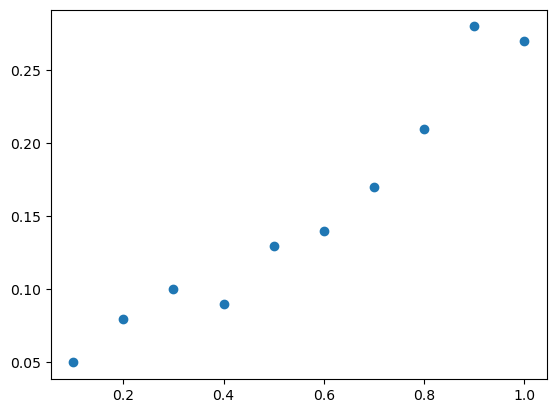

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
slr = LinearRegression()
slr.fit(X, y)
predict_y = slr.predict(X)
print('slope:',slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

slope: [0.25333333]
Intercept: 0.013


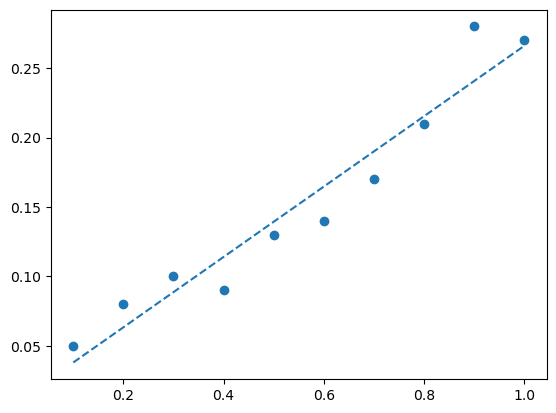

In [6]:
y_predict = slr.predict(X)
# plot results
plt.scatter(X, y, label='training points')
plt.plot(X, y_predict, label='linear fit', linestyle='--')
plt.show()

In [7]:
mse = np.mean((y-y_predict)**2)
print("MSE=",mse)

MSE= 0.00038133333333333346


In [8]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.6f' %mean_squared_error(y, predict_y))

MSE train: 0.000381


### 线性回归算法逻辑：
Inputs: 一组数据点

Outputs: 一条最接近数据点的线

Procedure:
- 先随机生成一条线.
- 不断调整这条线，让它去接近数据点


### 伪代码：

1.先给W一个随机的赋值

2.计算给定W下的模型预测值

3.计算模型预测值和真实目标值之间的差距，我们叫做损失函数，在线性回归这里就是算的MSE

4.根据损失函数来对W求导，根据梯度下降算法来修正W

每次迭代权重向量以如下方式修正更新： $$ w:= w + eta * (y-f(x))*x$$

具体实现代码如下：

In [9]:
class LinearRegressionGD:

    def __init__(self, eta=0.1, n_iter=20):
        self.eta = eta  # learning rate 学习率
        self.n_iter = n_iter  # 迭代次数

    def fit(self, X, y):  # 训练函数

        self.coef_ = np.zeros(shape=(1, X.shape[1]))  # 要训练的参数w，初始化为 0
        self.intercept_ = np.zeros(1)
        self.cost_ = []   # 用于保存损失

        for i in range(self.n_iter):
            output = self.net_input(X)  # 计算预测的Y
            errors = y - output  
            self.coef_ += self.eta * np.dot(errors.T, X)  # 根据更新规则更新系数
            self.intercept_ += self.eta * errors.sum()  # 更新 bias，相当于x取常数1
            cost = (errors**2).sum() / 2.0     # 计算损失
            self.cost_.append(cost)  # 记录损失函数的值
        return self

    def net_input(self, X):   # 给定系数和X计算预测的Y
        output = np.dot(X, self.coef_.T) + self.intercept_
        return output

    def predict(self, X):
        return self.net_input(X)

In [10]:
slr = LinearRegressionGD(eta=0.1, n_iter=20)
slr.fit(X, y);  # 喂入数据进行训练

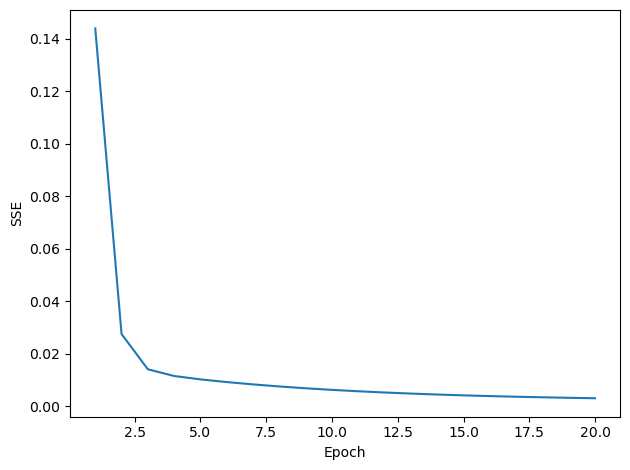

In [12]:
# cost function
plt.plot(range(1, slr.n_iter+1), slr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()

### 真实数据案例

In [14]:
# 读取数据
import pandas as pd
df = pd.read_csv('../data/Hyderabad.csv')
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [37]:
df.shape

(2518, 40)

In [17]:
import seaborn as sns

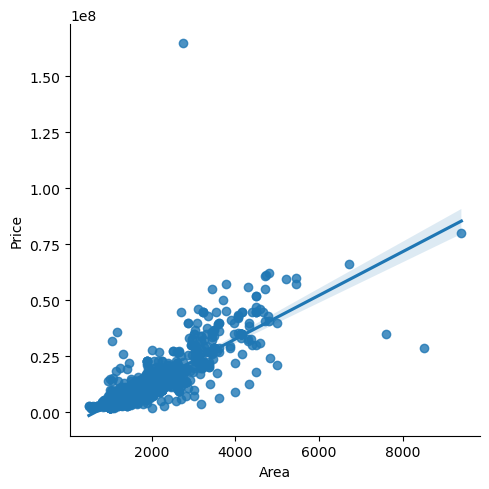

In [21]:
sns.lmplot(data=df,x="Area", y="Price")

In [24]:
X = df[['Area']].values
y = df[['Price']].values

In [25]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [33]:
slr = LinearRegression()
slr.fit(X_std, y_std)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.829
Intercept: 0.000


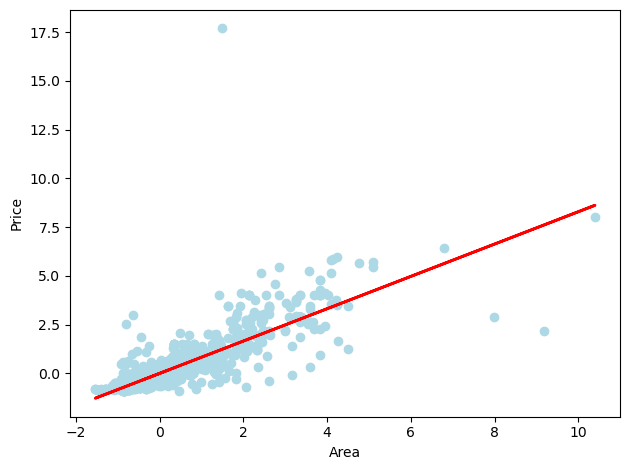

In [50]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    

lin_regplot(X_std, y_std, slr)
plt.xlabel('Area')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

### 稳健回归

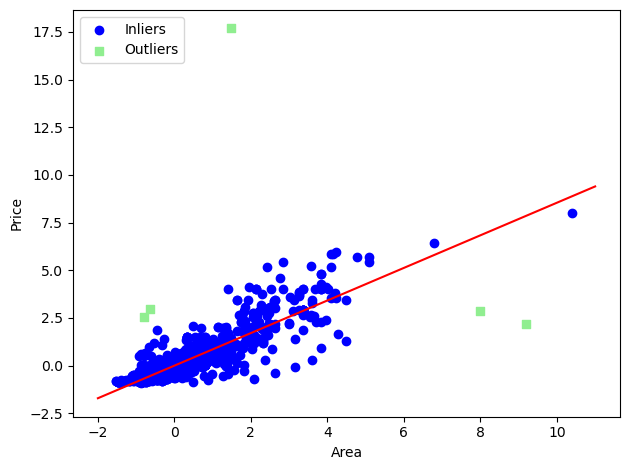

In [49]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, # max iteration
                         min_samples=50, # min number of randomly chosen samples
                         loss='absolute_error', # absolute vertical distances to measure
                         residual_threshold=3, # allow sample as inlier within 5 distance units
                         random_state=0)
ransac.fit(X_std, y_std)

# 分出 inlier 和 outlier
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(-2, 12, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X_std[inlier_mask], y_std[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X_std[outlier_mask], y_std[outlier_mask], c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')   
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend(loc='upper left')

plt.tight_layout()

### 多项式回归

In [51]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])[:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [52]:
# 添加二次项和截距项

from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

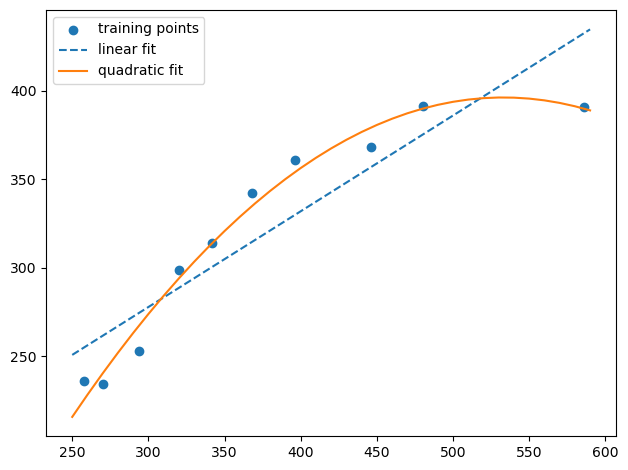

In [53]:
# fit linear features
lr.fit(X, y)
X_fit = np.arange(250,600,10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plot results
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')

plt.tight_layout()

In [54]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [57]:
print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330


### overfit和underfit问题

![Alt text](../img/ch04-04.png)

![Alt text](../img/ch04-05.png)

![Alt text](../img/ch04-06.png)

![Alt text](../img/ch04-07.png)

## 3. 逻辑回归算法实现

### 基本概念

In [122]:
import pandas as pd
df = pd.read_csv('../data/iris.csv')

In [123]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Setosa', 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

In [124]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [125]:
# use Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_std, y);

In [126]:
w1, w2 = lr.coef_[0]
print("w1:",w1,"\n""w2:",w2)
b = lr.intercept_[0]
print("b:",b)

w1: 0.673745367991571 
w2: 3.2408509145918525
b: 0.4413199956841686


In [127]:
a = -w1/w2
line_x = np.linspace(-2,2,100)
line_y = line_x*a - b

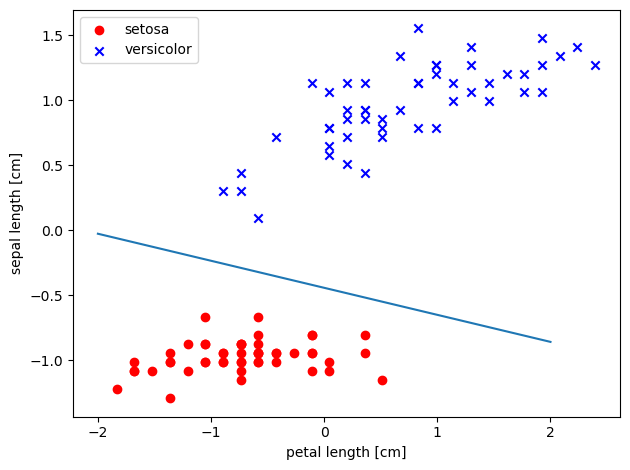

In [128]:
plt.scatter(X_std[:50, 0], X_std[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X_std[50:100, 0], X_std[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.plot(line_x,line_y)
plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()


### 算法实现

In [129]:
class LogisticRegression:
    def __init__(self, eta=0.01, n_iter=50): #初始类
        self.eta = eta
        self.n_iter = n_iter
    
    # 训练用函数
    def fit(self, X, y): 
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []       
        for i in range(self.n_iter):
            y_val = self.activation(X)
            errors = (y - y_val)
            neg_grad = X.T.dot(errors)  # 计算负梯度
            self.w_[1:] += self.eta * neg_grad # 根据梯度修正参数
            self.w_[0] += self.eta * errors.sum()
            self.cost_.append(self._logit_cost(y, self.activation(X)))
        return self

    # 计算损失函数
    def _logit_cost(self, y, y_val):
        logit = -y.dot(np.log(y_val)) - ((1 - y).dot(np.log(1 - y_val)))
        return logit
    
    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
    
    # 计算线性组合
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # 基于sigmoid对线性组合后的结果进行激活操作
    def activation(self, X):
        z = self.net_input(X)
        return self._sigmoid(z)
    
    def predict_proba(self, X):
        return activation(X)

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

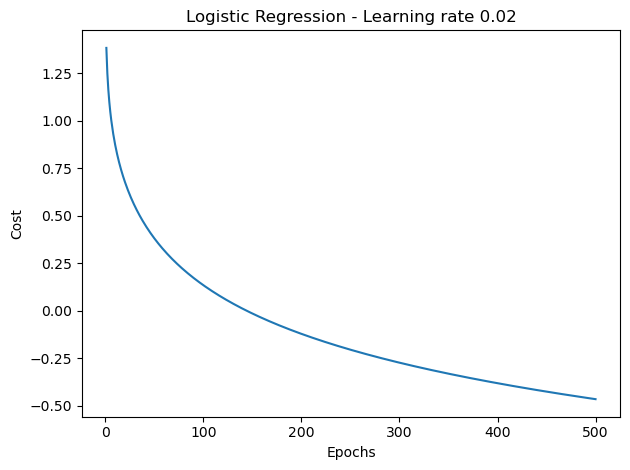

In [130]:
lr = LogisticRegression(n_iter=500, eta=0.02)
lr.fit(X_std, y)
plt.plot(range(1, len(lr.cost_) + 1), np.log10(lr.cost_))
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Logistic Regression - Learning rate 0.02')

plt.tight_layout()

### sigmoid函数



$$\displaystyle z = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum_{i=0}^nw_ix_i$$

$$\displaystyle \phi (z) = \frac{1}{1+e^{-z}}$$

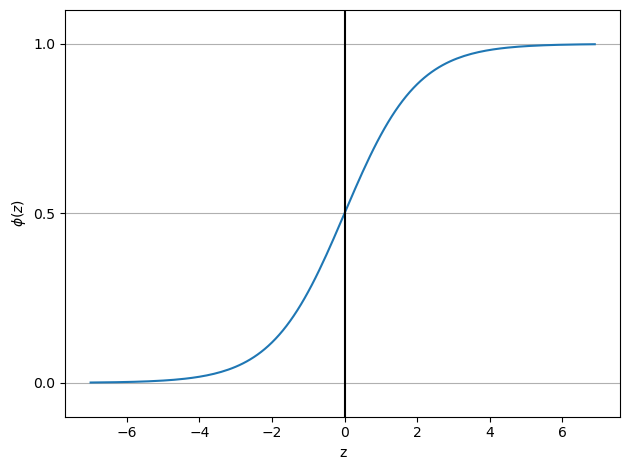

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z): #定义sigmoid函数
    return 1.0 / (1.0 + np.exp(-z))

# 定义了两个向量以便画图
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z) 

# 绘制出了函数曲线
plt.plot(z, phi_z)
# 如下定义了坐标线等参照以便观察
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()

### 交叉熵损失函数

$$J(\mathbf{w}) = \sum_{i=1}^{m} - y^{(i)} log \bigg( \phi\big(z^{(i)}\big) \bigg) - \big(1 - y^{(i)}\big) log\bigg(1-\phi\big(z^{(i)}\big)\bigg).$$

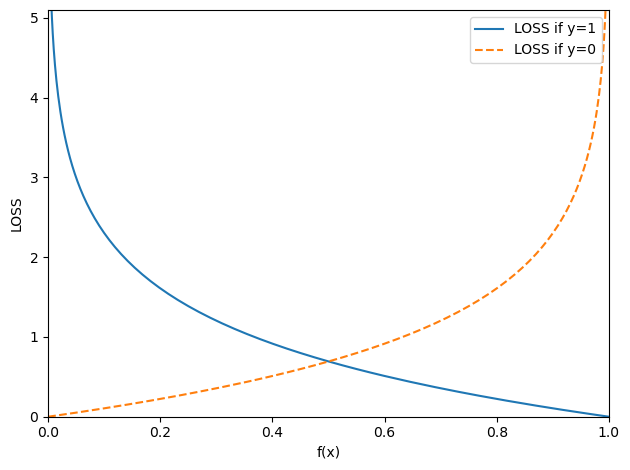

In [132]:
def cost_1(z):
    return - np.log(sigmoid(z))
                   
def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='LOSS if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='LOSS if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('f(x)')
plt.ylabel('LOSS')
plt.legend(loc='best')
plt.tight_layout()

### 分类问题的评估方法

In [134]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_std, y)
y_predict = lr.predict(X_std)

accuracy (标签预测正确的比例)

In [135]:
lr.score(X_std, y)

1.0

In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_predict)

1.0

![Alt text](../img/ch04-09.png)

In [138]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y, y_predict)
print(confmat)

[[50  0]
 [ 0 50]]


+ **Precision** is how many of the predictions for a class are actually that class.
+ **Recall** is how many of the true positives were recovered:
+  **TPR** : true positive rate
+  **FPR** : false positive rate

\begin{align}
&PRE = \frac{TP}{TP+FP} \\
&REC = TPR = \frac{TP}{FN+TP} \\
&FPR = \frac{FP}{FP+TN} \\
&TPR = \frac{TP}{FN+TP}
\end{align}

In [140]:
from sklearn.metrics import precision_score, recall_score, 

print('Precision: %.3f' % precision_score(y, y_predict))
print('Recall: %.3f' % recall_score(y, y_predict))

Precision: 1.000
Recall: 1.000


ROC曲线(Give Me Some Credit数据示例)

In [147]:
df_imputed = pd.read_csv('../data/df_imputed')

In [148]:
df_imputed.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,income_bins,age_bin,monthly_income_scaled
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,9,"(40, 45]",0.810162
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,2,"(35, 40]",-1.001111
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,3,"(35, 40]",-0.878322
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,3,"(25, 30]",-0.806649
4,0,0.907239,49,1,0.024926,15000.0,7,0,1,0,0.0,14,"(45, 50]",2.443640


In [157]:
features = [
 'income_bins',
 'age_bin',
 'monthly_income_scaled']
y = df_imputed.serious_dlqin2yrs
X = pd.get_dummies(df_imputed[features], columns = ['income_bins', 'age_bin'])

In [158]:
X

,monthly_income_scaled,income_bins_0,income_bins_1,income_bins_2,income_bins_3,income_bins_4,income_bins_5,income_bins_6,income_bins_7,income_bins_8,...,"age_bin_(30, 35]","age_bin_(35, 40]","age_bin_(40, 45]","age_bin_(45, 50]","age_bin_(50, 55]","age_bin_(55, 60]","age_bin_(60, 65]","age_bin_(65, 70]","age_bin_(70, 75]","age_bin_(75, 120]"
0,0.810162,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-1.001111,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-0.878322,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.806649,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.443640,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,-0.681638,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
149996,-0.473286,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149997,-0.681638,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
149998,1.054628,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [164]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
train_X, test_X, train_y, test_y = train_test_split(X, y ,train_size=0.7,random_state=1) 

Text(0, 0.5, 'TPR')

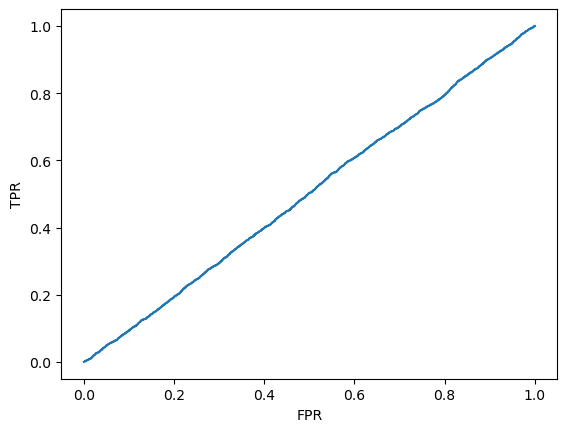

In [166]:
# Randomly generated predictions should give us a diagonal ROC curve
preds = np.random.rand(len(test_y))
fpr, tpr, thr = roc_curve(test_y, preds)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

0.6531727009371131


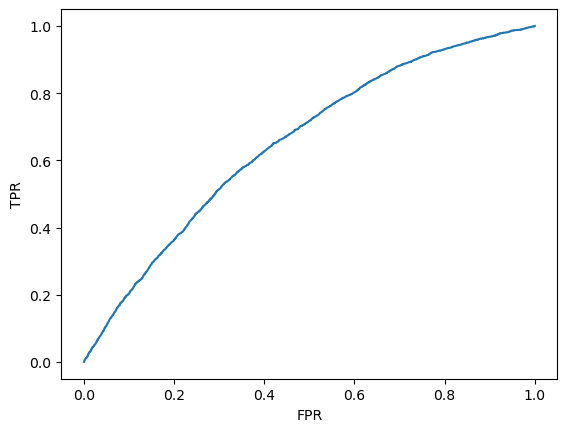

In [167]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() 
clf.fit(train_X,train_y)
preds = clf.predict_proba(test_X)[:,1]
fpr, tpr, thr = roc_curve(test_y, preds)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
print(roc_auc_score(test_y, preds))

In [ ]:
def roc_curve(true_labels, predicted_probs, n_points=100, pos_class=1):
    thr = np.linspace(0,1,n_points)
    tpr = np.zeros(n_points)
    fpr = np.zeros(n_points)

    pos = true_labels == pos_class
    neg = np.logical_not(pos)
    n_pos = np.count_nonzero(pos)
    n_neg = np.count_nonzero(neg)
      
    for i,t in enumerate(thr):
        tpr[i] = np.count_nonzero(np.logical_and(predicted_probs >= t, pos)) / float(n_pos)
        fpr[i] = np.count_nonzero(np.logical_and(predicted_probs >= t, neg)) / float(n_neg)
    
    return fpr, tpr, thr


### 其它变种写法

将常数项加到X中

In [116]:
X_std_add1 = np.concatenate([X_std,np.ones([X_std.shape[0],1])],axis = 1)

In [117]:
class LogisticRegression:
    def __init__(self, eta=0.01, n_iter=50): #初始类
        self.eta = eta
        self.n_iter = n_iter
    
    # 训练用函数
    def fit(self, X, y): 
        self.w_ = np.zeros(X.shape[1])
        self.cost_ = []       
        for i in range(self.n_iter):
            y_val = self.activation(X)
            errors = (y - y_val)
            neg_grad = X.T.dot(errors)  # 计算负梯度
            self.w_ += self.eta * neg_grad # 根据梯度修正参数
            self.cost_.append(self._logit_cost(y, self.activation(X)))
        return self

    # 计算损失函数
    def _logit_cost(self, y, y_val):
        logit = -y.dot(np.log(y_val)) - ((1 - y).dot(np.log(1 - y_val)))
        return logit
    
    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
    
    # 计算线性组合
    def net_input(self, X):
        return np.dot(X, self.w_) 

    # 基于sigmoid对线性组合后的结果进行激活操作
    def activation(self, X):
        z = self.net_input(X)
        return self._sigmoid(z)
    
    def predict_proba(self, X):
        return activation(X)

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

如果数据量比较大

In [119]:
class LogisticRegression:
    def __init__(self, eta=0.01, n_iter=50, batch_size = 32): #初始类
        self.eta = eta
        self.n_iter = n_iter
        self.batch_size = batch_size
    
    # 训练用函数
    def fit(self, X, y): 
        self.w_ = np.zeros(X.shape[1])
        self.cost_ = []       
        for i in range(self.n_iter):
            sample_index = np.random.choice(X.shape[0],self.batch_size)
            sample_X = X[sample_index,:]
            sample_y = y[sample_index]
            y_val = self.activation(sample_X)
            errors = (sample_y - y_val)
            neg_grad = sample_X.T.dot(errors)  # 计算负梯度
            self.w_ += self.eta * neg_grad # 根据梯度修正参数
            self.cost_.append(self._logit_cost(sample_y, self.activation(sample_X)))
        return self

    # 计算损失函数
    def _logit_cost(self, y, y_val):
        logit = -y.dot(np.log(y_val)) - ((1 - y).dot(np.log(1 - y_val)))
        return logit
    
    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
    
    # 计算线性组合
    def net_input(self, X):
        return np.dot(X, self.w_) 

    # 基于sigmoid对线性组合后的结果进行激活操作
    def activation(self, X):
        z = self.net_input(X)
        return self._sigmoid(z)
    
    def predict_proba(self, X):
        return activation(X)

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

如果想使用正则化方法

In [ ]:
class LogitGD:
    
    def __init__(self, eta=0.01, lamb = 0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        self.lamb = lamb

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors) - self.lamb* self.w_[1:]
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0 + self.lamb* np.sum(self.w_[1:]**2)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def sigmoid(z):
        return 1.0 / (1.0 + np.exp(-z))

    def activation(self, X):
        return sigmoid(self.net_input(X))

    def predict(self, X):
        return np.where(self.activation(X) >= 0.5, 1, -1)

![Alt text](../img/ch04-08.png)

## 4. scikit learn模块基础

### Classification
Identifying which category an object belongs to.

- Applications: Spam detection, image recognition.
- Algorithms: Gradient boosting, nearest neighbors, random forest, logistic regression

### Regression
Predicting a continuous-valued attribute associated with an object.

- Applications: Drug response, Stock prices.
- Algorithms: Gradient boosting, nearest neighbors, random forest, ridge

### Clustering
Automatic grouping of similar objects into sets.

- Applications: Customer segmentation, Grouping experiment outcomes
- Algorithms: k-Means, HDBSCAN, hierarchical clustering

### Dimensionality reduction
Reducing the number of random variables to consider.

- Applications: Visualization, Increased efficiency
- Algorithms: PCA, feature selection, non-negative matrix factorization

### Model selection
Comparing, validating and choosing parameters and models.

- Applications: Improved accuracy via parameter tuning
- Algorithms: grid search, cross validation, metrics

### Preprocessing
Feature extraction and normalization.

- Applications: Transforming input data such as text for use with machine learning algorithms.
- Algorithms: preprocessing, feature extraction

## 扩展阅读

- https://scikit-learn.org/stable/index.html